In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


TITANIC TRANSCRITPION

DAY 1 필사 시작

만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤것을 해야하는지 잘 모르는 NEWBEL이라면, 타이타닉으르 하시는게 가장 좋은 선택입니다.

타이타닉은 아시다시피, 사상 최대 해난사고로 15000여명의 희생자가 생겼습니다.
우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것입니다.

본 튜토리얼에서는 여러 시각화 도구(matplotlib, seaborn, plotly), 데이터 분석 도구(panda, numpy), 머신러닝도구(sklearn)을 사용할 것입니다.

본 튜토리얼은 캐글에 있는 여러 커널들을 차마조하여 만들었습니다. 본 튜토리얼을 공부하신 뒤에, 캐글 타이타닉 컴퍼티션에 존재하는 여러 다른 커널들을 더 공부하시면 됩니다.

본 튜토리얼은 파이썬 문법에 어려움이없으셔야 수월할 것입니다. 여기서 사용하는 라이브러리들을 써 본 경험이 있다면 좋겠지만, 경험이 없다하더라도 한줈ㄱ 천천히 적어나가시면 충분히 하실 수 있습니다.




In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib의 기본 scheme말고 seaborn scheme을 세팅하고, 
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.

# import seaborn as sns
# sns.set()  # This applies the default Seaborn style

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

앞으로 우리가 해야할 프로세스는 대락 아래와 같습니다.
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정체되어 있습니다. 하지만 가끔 NULL DATA가 존재합니다. 이를 확인하고 향후 수정합니다.
2. 탐색적 데이터 분석(exploratory data anaysis) -여러 feature들을 개별적으로 부넉하고, feature들 간의 상관관계를 확인합니다. 여럽 시각화 툴을 사용하여 insight를 얻습니다.
3. feature enginering- 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합ㄴ디ㅏ.
4. model만들기 - sklearn을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pythorch등을 사용할 수 도 있습니다.
5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction합니다.
6. 모델 평가 - 예측 성능ㅇ이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방법도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

#### 1. Dataset 확인
-  파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas입니다.
-  우리는 pandas 를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
-  파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
-  캐글에서 데이터셋은 보통 train, testset으로 나뉘어 있습니다.

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


- 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived입니다.

## 🧾 Titanic Dataset – Feature Summary

|Feature   | Definition                  | Description                                                        | Type      |
|-----------|-----------------------------|--------------------------------------------------------------------|-----------|
|survival  | Survival                    | Target label – 1 = Survived, 0 = Did not survive                   | integer   |
|Pclass    | Ticket class                | 1 = 1st, 2 = 2nd, 3 = 3rd (Categorical feature)                    | integer   |
| sex       | Sex                         | Gender – male or female (Binary)                                   | string    |
| Age       | Age                         | Passenger's age (Continuous)                                       | integer   |
| sibSp     | # of siblings/spouses aboard| Number of siblings and spouses aboard                              | integer   |
| parch     | # of parents/children aboard| Number of parents and children aboard                              | integer   |
| ticket    | Ticket number               | Alphanumeric (string with letters and numbers)                     | string    |
| fare      | Fare                        | Ticket price (Continuous)                                          | float     |
 cabin      |Cabin number         |  Cabin ID (often missing), Alphanumeric                             | string    |
 embarked  | Port of embarkation         | C = Cherbourg, Q = Queenstown, S = Southampton                     | string    |


- pandas datafram에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해줍니다.

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시키, PassengerID숫자와 다른, 그러니까 null data가 존재하는 열(feature)가 있는 것 같습니다.
- 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시다.

### 1.1 Null data check

In [9]:
for col in df_train.columns:
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum() / df_train[col].shape[0]))
        print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


|line          |Menaing
|------------|----------------
|for col in df_train.columns:        | Loop through all column names in the Datafrom 'df_train'|
|df_train[col].isnull().sum()        | Count how many missing (NaN) values are in that column|
|df_train.shape[0]                   | Total number of rows in the DataFrame |
|100 * (...) | Calculate the **percentage** of missing values
|'column: {:>10}\t ercent of NaN value: {:.2f}%' | Format the output with column name and percentage neatly aligned|

In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value {:.2f}%'.format (col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value 0.00%
column:     Pclass	 Percent of NaN value 0.00%
column:       Name	 Percent of NaN value 0.00%
column:        Sex	 Percent of NaN value 0.00%
column:        Age	 Percent of NaN value 20.57%
column:      SibSp	 Percent of NaN value 0.00%
column:      Parch	 Percent of NaN value 0.00%
column:     Ticket	 Percent of NaN value 0.00%
column:       Fare	 Percent of NaN value 0.24%
column:      Cabin	 Percent of NaN value 78.23%
column:   Embarked	 Percent of NaN value 0.00%


- Train, Test est에서 Age(둘다 약 20%), Cabin(둘다 약 80%), (Enbarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.
- MANO 라는 라이브러리를 사용하면 null datad의 존재를 더 쉽게 볼 수 있습니다.

<Axes: >

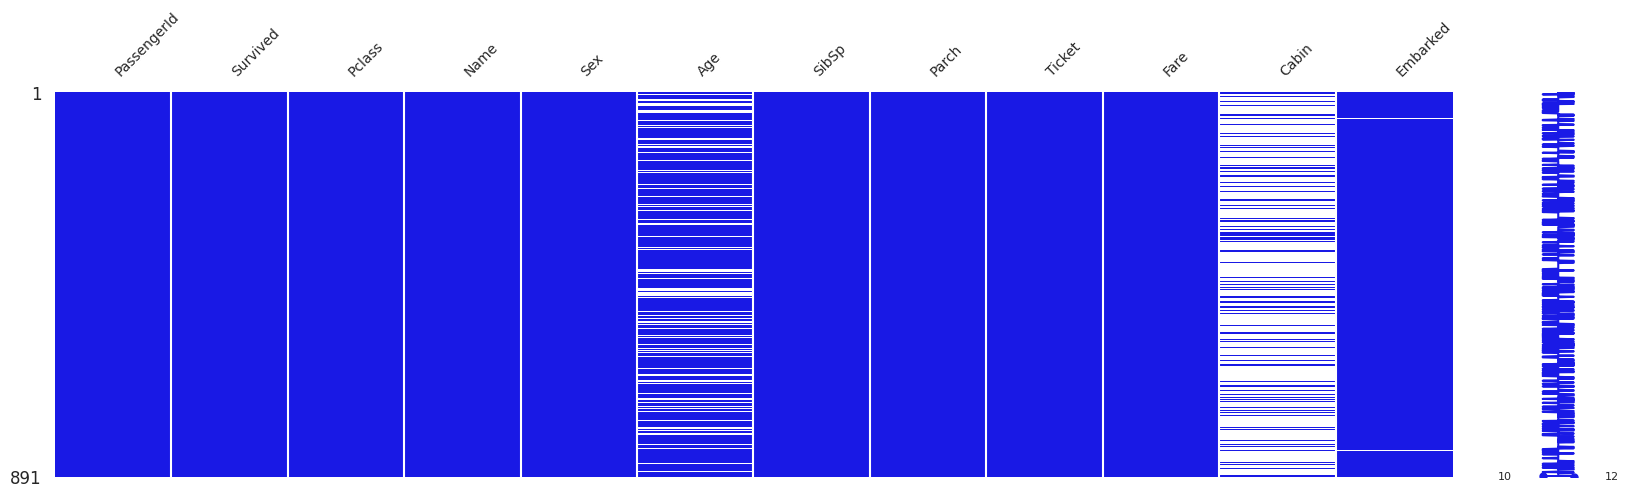

In [11]:
import missingno as msno

msno.matrix(df=df_train.iloc[:,:], fontsize=10, figsize=(20,5), color=(0.1, 0.1, 0.9))


|구성요소 | 설명|
|--------|--------------|
|missingno.matrix() | NaN 값을 세로 막대 시각화로 보여줌|
|df=df_train | Titanic 데이터프레임 사용|
|figsize=(8,8) | 그림 사이즈 지정|
|color=(0.8, 0.5, 0.2) |시각화 색상 지정 (RGB 값)|

<Axes: >

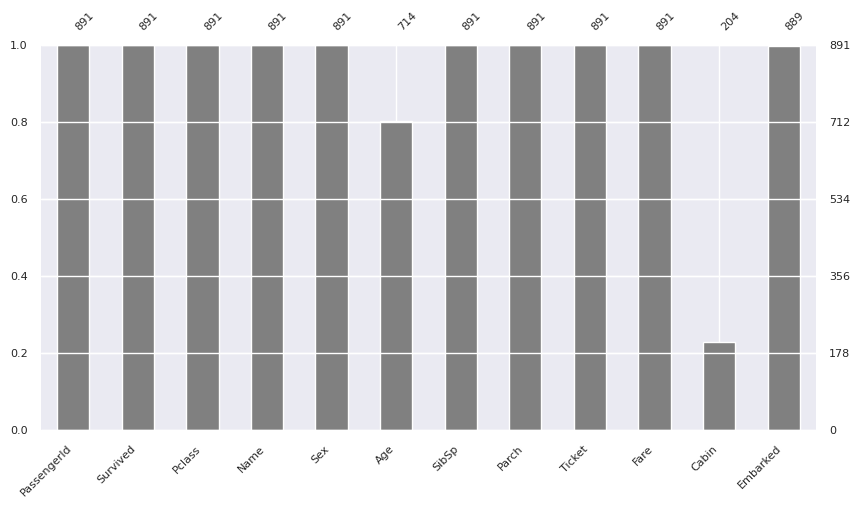

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(10,5),color=(0.5, 0.5, 0.5), fontsize=8)

<Axes: >

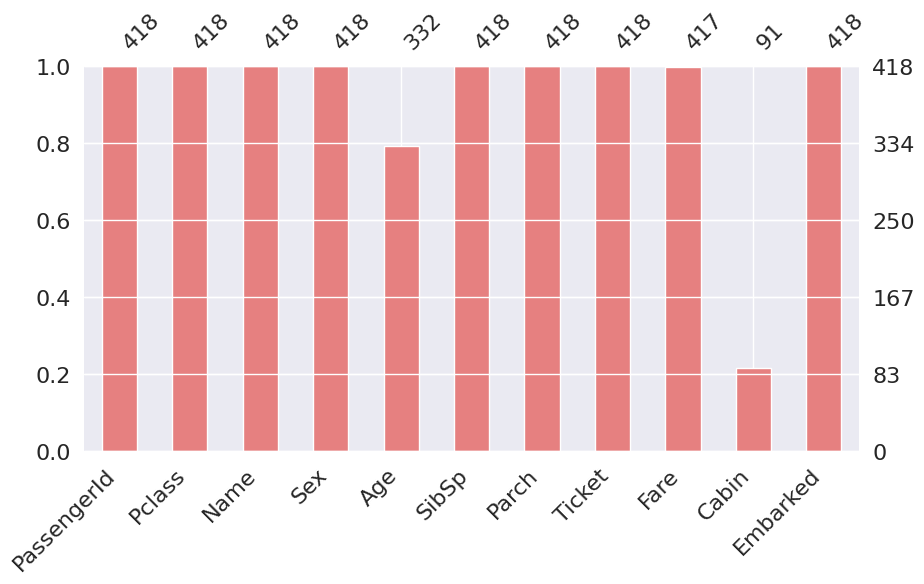

In [13]:
msno.bar(df=df_test.iloc[:,:], figsize=(10,5), color=(0.9, 0.5, 0.5))

# 